In [316]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [317]:
data = pd.read_csv('laptop_data.csv')
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [318]:
data.drop(columns=['Unnamed: 0'], inplace=True)

The column Unnamed: 0 is often created when importing CSV files that contain an unnamed index column. This line removes it from the DataFrame.

In [319]:
# Remove GB and kg from Ram and Weight and convert the cols to numeric
data['Ram'] = data['Ram'].str.replace('GB', '')
data['Weight'] = data['Weight'].str.replace('kg', '')
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

Clean and convert the Ram and Weight columns into numeric data types.

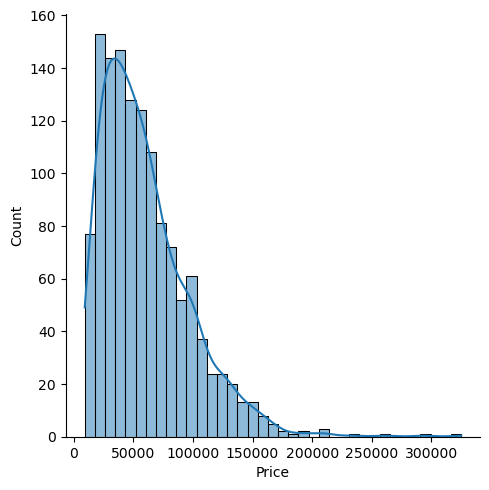

In [320]:
sns.displot(data['Price'], kde=True)
plt.show()

Visualize the distribution of Price

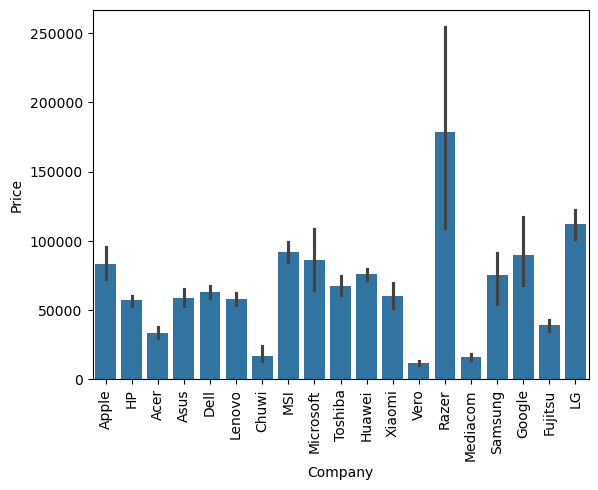

In [321]:
# What is avg price of each brand ?

sns.barplot(x=data['Company'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

* The x-axis has the unique values from the Company column
* The y-axis represents the average Price for each company.
* Each bar's height corresponds to the average price of that brand.

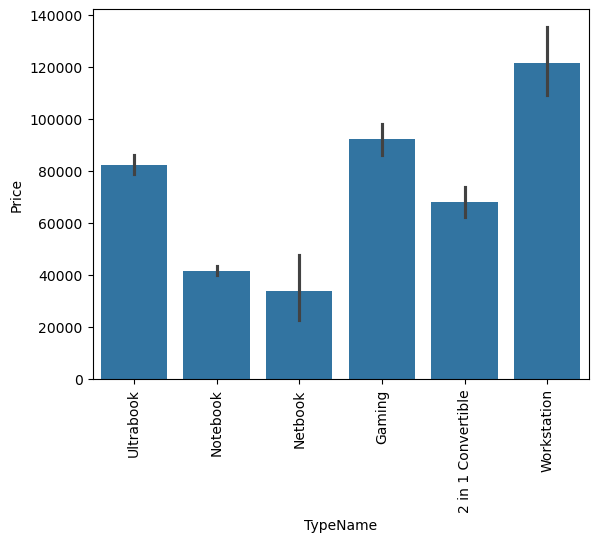

In [322]:
sns.barplot(x=data['TypeName'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

* The x-axis represents the different product types (TypeName).
* The y-axis shows the average price for each product type.
* Each bar's height corresponds to the average price of that product type.

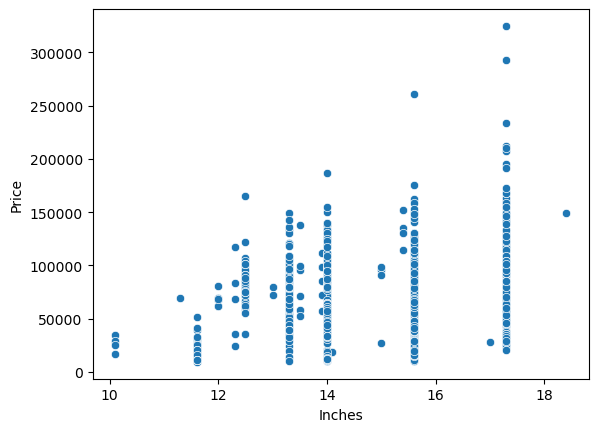

In [323]:
sns.scatterplot(x=data['Inches'], y=data['Price'])
plt.show()

Visually explore how Price is related to Inches

<Axes: xlabel='Touchscreen', ylabel='Price'>

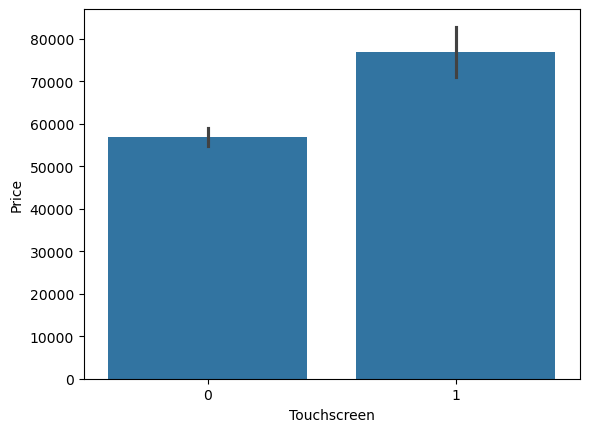

In [324]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

# Plot against Price
sns.barplot(x=data['Touchscreen'], y=data['Price'])

* One for laptops with a touchscreen (where Touchscreen = 1).
* One for laptops without a touchscreen (where Touchscreen = 0).
* The height of each bar represents the average price for each category (touchscreen vs. non-touchscreen laptops).

<Axes: xlabel='Ips', ylabel='Price'>

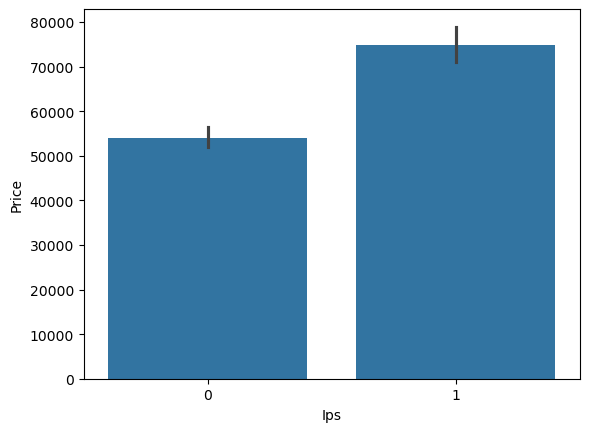

In [325]:
# Extract IPS columns
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=data['Ips'], y=data['Price'])

* One for laptops with an IPS display (Ips = 1).
* One for laptops without an IPS display (Ips = 0).
* The height of each bar will show the average price for each category (IPS vs non-IPS laptops).

In [326]:
def findXresolution(s):
    return s.split()[-1].split('x')[0]
def findYresolution(s):
    return s.split()[-1].split('x')[1]

Extract the width (X resolution) and height (Y resolution) of the screen resolution from a string in the format "width x height" (e.g., "1920x1080").

In [327]:
# Finding the X_res and Y_res from screen resolution
data['X_res'] = data['ScreenResolution'].apply(lambda x: findXresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: findYresolution(y))

# Convert to numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

Extracts the X (width) and Y (height) resolution from the ScreenResolution column and converts them to numeric types. 

In [328]:
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2)) **0.5 / data['Inches']).astype('float')
data_numeric = data.drop(columns=['Company', 'TypeName', 'ScreenResolution', 'Gpu', 'Cpu', 'Memory', 'OpSys'])
data_numeric.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Ips            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

Calculate the PPI (pixels per inch) for each laptop and then compute the correlation between the numeric columns and the Price column in the data

In [329]:
data.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace=True)

This will make the data more focused on the relevant features (Price, ppi, and other numeric features) and remove redundant or already computed data like screen resolutions.

In [330]:
# First we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
    cpu_name = ' '.join(x.split()[0:3])
    if cpu_name in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
        return cpu_name
    elif cpu_name.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

Extract the first three words from the Cpu column, identifie the type of processor (whether it's an Intel Core i7, i5, i3, or an AMD processor), and categorize it accordingly.

In [331]:
data['Cpu_brand'] = data['Cpu'].apply(lambda x: fetch_processor(x))

Applie the fetch_processor function to the Cpu column and create a new column, Cpu_brand, which stores the processor brand based on the first three words of the CPU name.

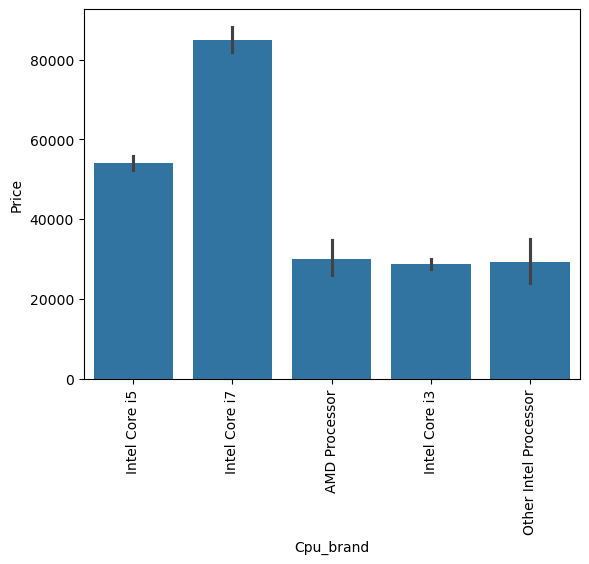

In [332]:
sns.barplot(x=data['Cpu_brand'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

Show the average Price for each Cpu_brand, each bar represents a different CPU type, and its height corresponds to the average price of laptops with that CPU type.

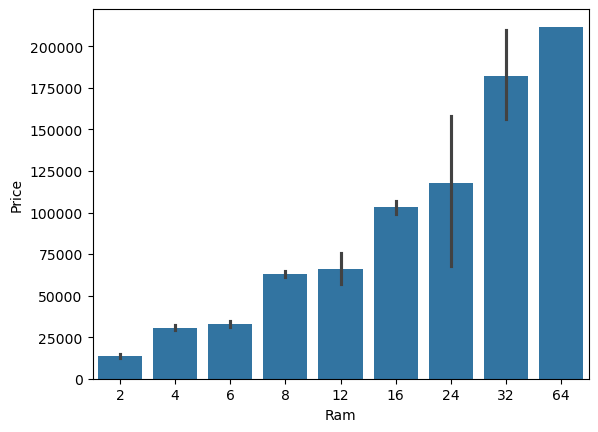

In [333]:
sns.barplot(x=data['Ram'], y=data['Price'])
plt.show()

Visualize the relationship between the Ram (RAM size) and the Price of the laptops

In [334]:
# Preprocessing
data['Memory'] = data['Memory'].astype(str).replace('.0','', regex=True)
data['Memory'] = data['Memory'].str.replace('GB','')
data['Memory'] = data['Memory'].str.replace('TB','')

new = data['Memory'].str.split('+', n=1, expand=True)

data['first'] = new[0]
data['first'] = data['first'].str.strip()

data['second'] = new[1]

data['Layer1HDD'] = data['first'].apply(lambda x:1 if 'HDD' in x else 0)
data['Layer1SSD'] = data['first'].apply(lambda x:1 if 'SSD' in x else 0)
data['Layer1Hybrid'] = data['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
data['Layer1Flash_Storage'] = data['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

data['first'] = data['first'].str.replace('HDD', '')
data['first'] = data['first'].str.replace('SSD', '')
data['first'] = data['first'].str.replace('Hybrid', '')
data['first'] = data['first'].str.replace(' Flash Storage', '')



data['second'].fillna('0', inplace=True)

# Binary Encoding
data['Layer2HDD'] = data['second'].apply(lambda x:1 if 'HDD' in x else 0)
data['Layer2SSD'] = data['second'].apply(lambda x:1 if 'SSD' in x else 0)
data['Layer2Hybrid'] = data['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
data['Layer2Flash_Storage'] = data['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

# Only keep digits
data['second'] = data['second'].str.replace('HDD', '')
data['second'] = data['second'].str.replace('SSD', '')
data['second'] = data['second'].str.replace('Hybrid', '')
data['second'] = data['second'].str.replace(' Flash Storage', '')


C:\Users\moham\AppData\Local\Temp\ipykernel_10916\1764119106.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['second'].fillna('0', inplace=True)


The code preprocesses the Memory column by:

1) Removing 'GB' and 'TB', and splitting the values into two parts (first and second layers).
2) Creating binary features for HDD, SSD, Hybrid, and Flash Storage for both layers.
3) Cleaning up the first and second columns by removing storage types and filling missing values in the second column.

In [335]:
# Convert to numeric
data['first'] = data['first'].astype(int)
data['second'] = data['second'].astype(int)

# Finalize the columns by keeping value
data['HDD'] = (data['first'] * data['Layer1HDD'] + data['second'] * data['Layer2HDD'])
data['SSD'] = (data['first'] * data['Layer1SSD'] + data['second'] * data['Layer2SSD'])
data['Hybrid'] = (data['first'] * data['Layer1Hybrid'] + data['second'] * data['Layer2Hybrid'])
data['Flash_Storage'] = (data['first'] * data['Layer1Flash_Storage'] + data['second'] * data['Layer2Flash_Storage'])

# Drop the unrequired columns
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

The data now has new columns (HDD, SSD, Hybrid, Flash_Storage) representing the total storage for each type, and the intermediate columns are removed for cleaner data.

In [336]:
data.drop(columns=['Hybrid', 'Flash_Storage', 'Memory', 'Cpu'], inplace=True)

The data is cleaned up by dropping these unneeded columns, leaving only the relevant ones for analysis.

In [337]:
# Which brand GPU is in laptop
data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])

# There is only 1 row of ARM GPU so remove it
data = data[data['Gpu_brand'] != 'ARM']
data.drop(columns=['Gpu'], inplace=True)

The data now has a new Gpu_brand column with GPU brands, and the Gpu column is removed. Additionally, the row with the 'ARM' GPU is excluded from the data.

In [338]:
# Get which OS
def cat_os(inp):
    if inp in ['Windows 10', 'Windows 7', 'Windows 10S']:
        return 'Windows'
    elif inp in ['macOS', 'Mac OS X']:
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

cat_os is designed to categorize the operating system (OS) into three main categories based on the input string (inp)

In [339]:
data['os'] = data['OpSys'].apply(cat_os)
data.drop(columns=['OpSys'], inplace=True)

The data will now have an os column with categorized OS values, and the OpSys column will no longer be present.

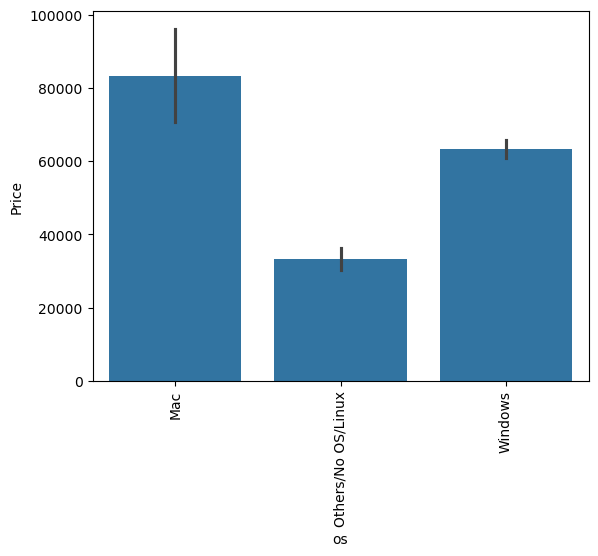

In [340]:
sns.barplot(x=data['os'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

The plot displays three bars, with the height of each bar representing the average price of laptops with that OS.

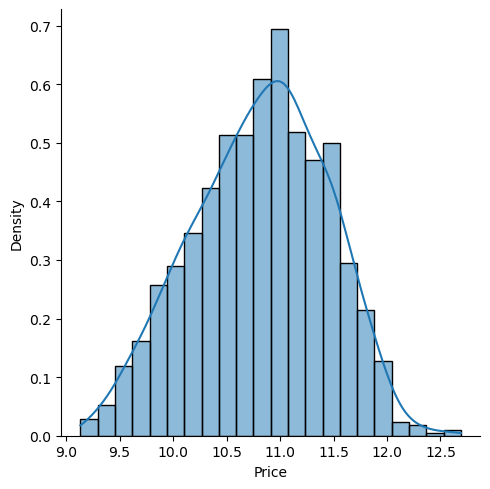

In [341]:
sns.displot(np.log(data['Price']), kde=True, stat='density')
plt.show()

The logarithmic transformation helps make the distribution more symmetric, allowing for easier interpretation and modeling.

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [343]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


1) Defining features (X) and target (y)
2) Splitting into training and testing sets

In [344]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])], remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score : ', r2_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))

R2 score :  0.8842904862341111
MAE :  0.1591148301252382


* ColumnTransformer: This is used to apply different preprocessing steps to different subsets of columns.
* OneHotEncoder: This encodes categorical features using one-hot encoding.  
-- sparse_output=False: Ensures that the result is a dense array (not sparse).  
-- drop='first': Drops the first category of each categorical feature to avoid multicollinearity (dummy variable trap).  
-- [0, 1, 7, 10, 11]: These indices refer to the columns that should be one-hot encoded (the categorical features).  
-- remainder='passthrough': Columns not listed for transformation will be passed through unmodified.

* RandomForestRegressor: A regression model using an ensemble of decision trees.  
-- n_estimators=100: The number of trees in the forest.  
-- random_state=3: Ensures reproducibility by fixing the random seed.
-- max_samples=0.5: Each tree is trained on 50% of the training data.  
-- max_features=0.75: Each tree is trained on a random subset of 75% of the features.  
-- max_depth=15: Limits the depth of each tree to 15 levels, preventing overfitting.

* Pipeline: Combines the preprocessing step (step1) and the model (step2) into one sequential workflow.

* r2_score: Computes the R-squared (R²) score, which measures how well the model explains the variance in the target variable.
* mean_absolute_error: Computes the mean absolute error (MAE), which measures the average absolute difference between predicted and actual values.

* The R² score of 0.884 is strong, showing that the model has a good fit.
* The MAE value of 0.159 suggests that the model's predictions are close to the actual values, with a small average error.